In [1]:
import numpy as np
import pandas as pd

# Load Dataset 

In [3]:
dataset = pd.read_csv('data_temp/100_gauge.csv', index_col=False)

In [4]:
split_index = int(0.7 * len(dataset))
X = dataset.drop(['prec'], axis=1)
y = dataset['prec']
X_train, X_test, y_train, y_test = X.iloc[:split_index], X.iloc[split_index:], y.iloc[:split_index], y.iloc[split_index:]

In [5]:
X_train, X_test, y_train, y_test = X.iloc[:split_index], X.iloc[split_index:], y.iloc[:split_index], y.iloc[split_index:]

In [8]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt

# Create Basic XG Boost model

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [19]:
y_pred = xgb_model.predict(X_test)

# Berechne den Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 11.434508116044405
Root Mean Squared Error: 3.381494952834383


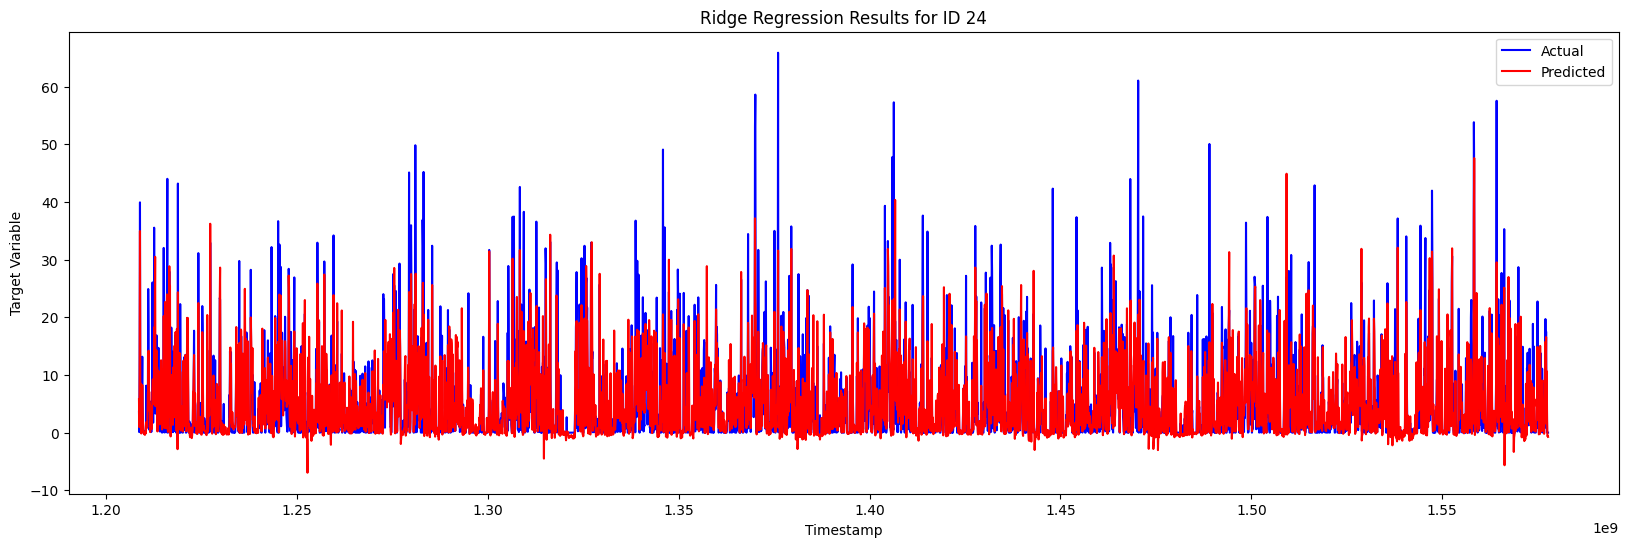

In [20]:
results_df = pd.DataFrame({'ID': X_test['ID'], 'Timestamp': X_test['Timestamp'],  'Actual': y_test, 'Predicted': y_pred})
specific_id = 24
filtered_results = results_df[results_df['ID'] == specific_id]

plt.figure(figsize=(20, 6))

# Plot für unterschiedliche Zeitpunkte mit Linien
plt.plot(filtered_results['Timestamp'], filtered_results['Actual'], color='blue', label='Actual')
plt.plot(filtered_results['Timestamp'], filtered_results['Predicted'], color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Target Variable')
plt.title(f'XGBoost Results for ID {specific_id}')
plt.legend()
plt.show()

# Use Grid Search for find best Hyperparameters  

In [29]:
xgb_model = XGBRegressor(random_state=42)

In [30]:
pipeline = Pipeline([('scaler', StandardScaler()), ('xgb', XGBRegressor(random_state=42))])

# Definiere die Parameter für die Grid Search
param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__max_depth': [3, 4, 5],
    'xgb__min_child_weight': [1, 2, 3],
}

# Durchführung der Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Die besten Hyperparameter aus der Grid Search
best_params = grid_search.best_params_
print(f"Beste Hyperparameter: {best_params}")

# Mache Vorhersagen auf dem Testset mit dem besten Modell
y_pred = grid_search.predict(X_test)

# Berechne den Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Beste Hyperparameter: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 200}
Mean Squared Error: 11.933315905141537
Root Mean Squared Error: 3.454463186247834


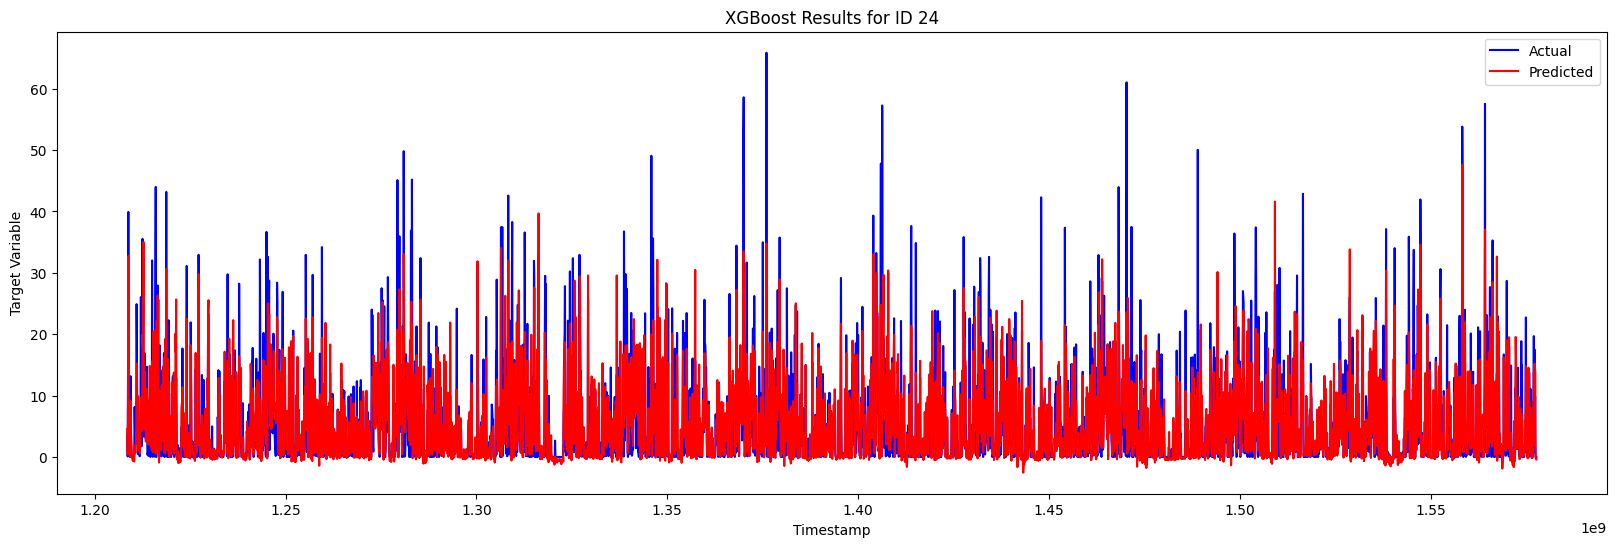

In [36]:
results_df = pd.DataFrame({'ID': X_test['ID'], 'Timestamp': X_test['Timestamp'],  'Actual': y_test, 'Predicted': y_pred})
specific_id = 24
filtered_results = results_df[results_df['ID'] == specific_id]

plt.figure(figsize=(20, 6))

# Plot für unterschiedliche Zeitpunkte mit Linien
plt.plot(filtered_results['Timestamp'], filtered_results['Actual'], color='blue', label='Actual')
plt.plot(filtered_results['Timestamp'], filtered_results['Predicted'], color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Target Variable')
plt.title(f'XGBoost Results for ID {specific_id}')
plt.legend()
plt.show()

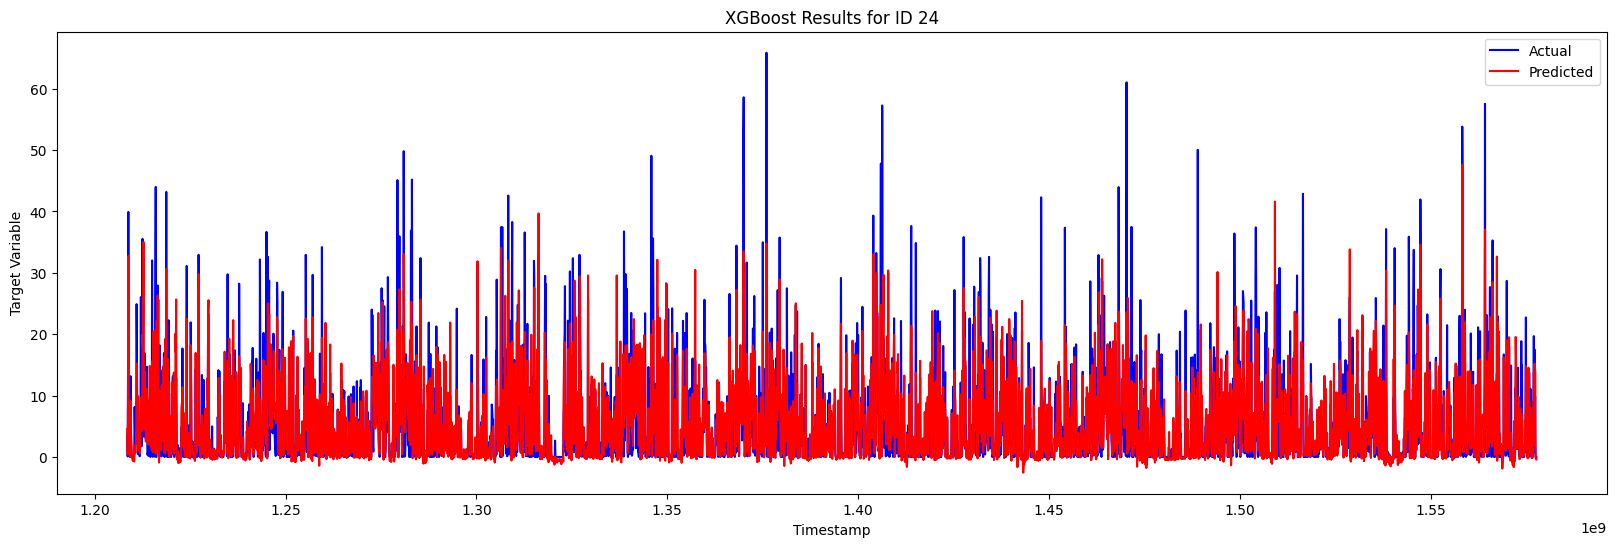

In [ ]:
results_df = pd.DataFrame({'ID': X_test['ID'], 'Timestamp': X_test['Timestamp'],  'Actual': y_test, 'Predicted': y_pred})
specific_id = 24
filtered_results = results_df[results_df['ID'] == specific_id]

plt.figure(figsize=(20, 6))

# Plot für unterschiedliche Zeitpunkte mit Linien
plt.plot(filtered_results['Timestamp'], filtered_results['Actual'], color='blue', label='Actual')
plt.plot(filtered_results['Timestamp'], filtered_results['Predicted'], color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Target Variable')
plt.title(f'XGBoost Results for ID {specific_id}')
plt.legend()
plt.show()

# Plot Feature importance

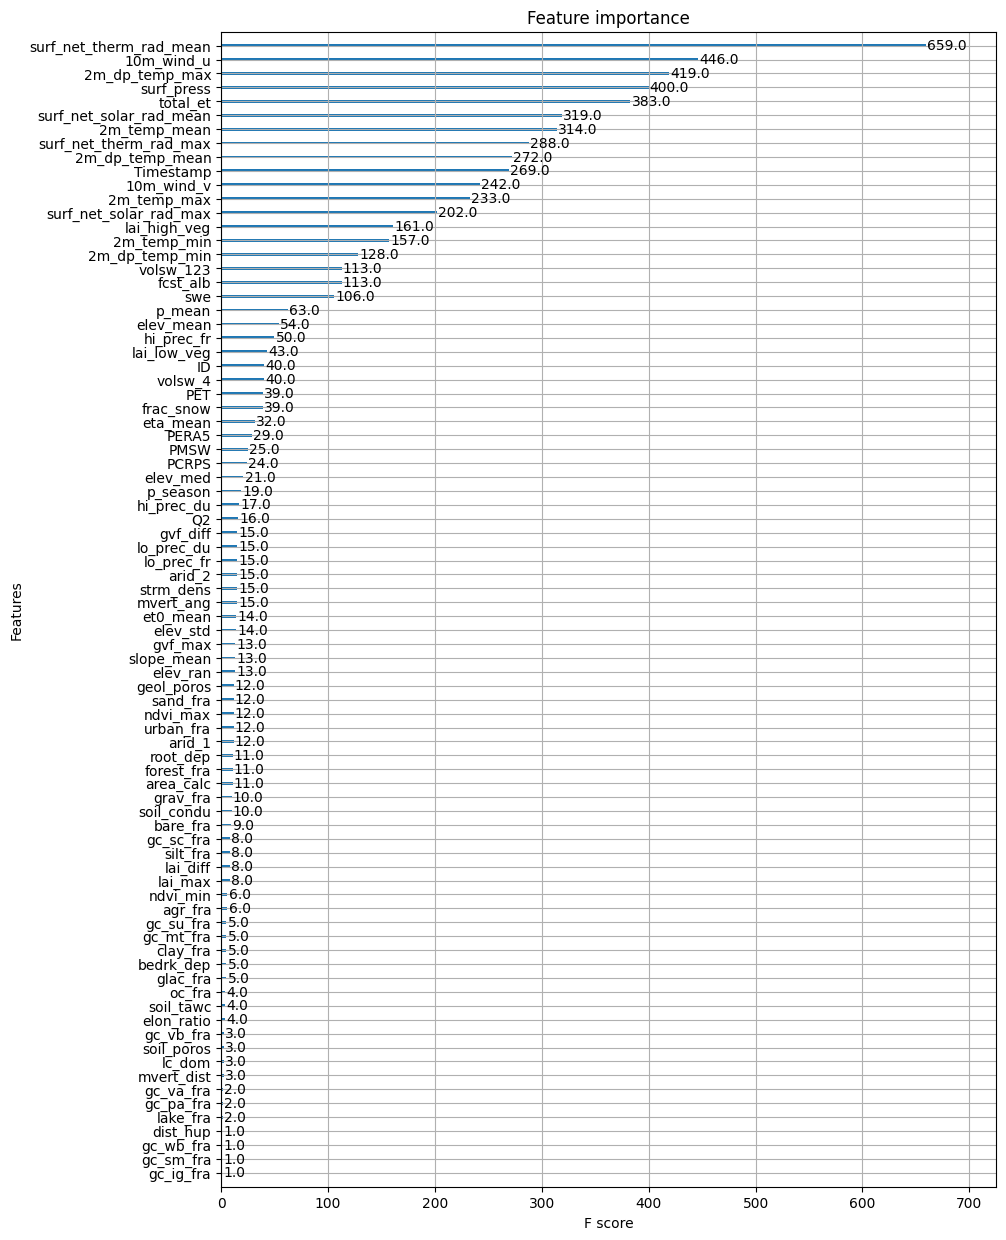

In [34]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 15))
plot_importance(xgb_model, ax=ax)
plt.show()